In [1]:
%matplotlib inline
import subprocess
import time
import cv2
import os
import matplotlib.pyplot as plt
from import_me import *

In [2]:
with open("../11-04-2019 RTL/red_dot.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

header = orig[:122]
#preamble = np.unpackbits(preamble)

In [3]:
# se não tiver usado o código

CPU times: user 4.66 s, sys: 25 ms, total: 4.68 s
Wall time: 4.68 s


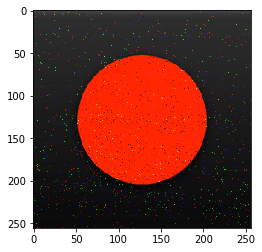

In [4]:
%%time
img_12db_S, rcv_array = readOutput("12dB_semBCH.data", np.array([67 + 0, 255], dtype = np.uint8), header, (256, 256))
plt.imshow(img_12db_S)

In [ ]:
%%time
for i in range(20):
#     i = 0
    print(f"Script para delay: {i}")
    process=subprocess.Popen(["python2", "BCH_Recoder.py", "--delay", str(i)],
                             stdin=subprocess.PIPE,
                             stdout=subprocess.PIPE,
                             stderr=subprocess.PIPE)


    time.sleep(10)

    inputdata= b" "
    stdoutdata,stderrdata=process.communicate(input=inputdata)
    
    print(f"Imagem para delay {i}")
    img, rcv_array = readOutput("output2.data", np.array([67 + 0, 255], dtype = np.uint8), header, (256, 256))
    plt.imshow(img)
    plt.show()
    print("*" * 20)

12


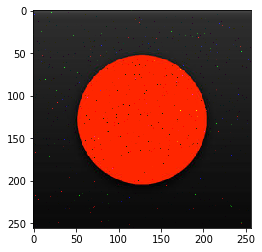

CPU times: user 5.06 s, sys: 325 ms, total: 5.39 s
Wall time: 15 s


In [5]:
%%time
i =  12


process=subprocess.Popen(["python2", "BCH_Recoder.py", "--delay", str(i)],
                             stdin=subprocess.PIPE,
                             stdout=subprocess.PIPE,
                             stderr=subprocess.PIPE)


time.sleep(10)

inputdata= b" "
stdoutdata,stderrdata=process.communicate(input=inputdata)

img, rcv_array = readOutput("output2.data", np.array([67 + 0, 255], dtype = np.uint8), header, (256, 256))
print(i)
plt.imshow(img)
plt.show()

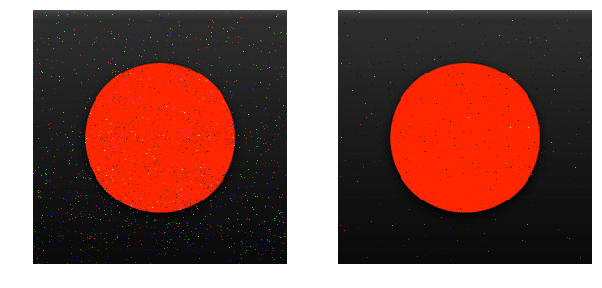

In [6]:
fig, axis = plt.subplots(1, 2, figsize = (10, 10))
[ax.set_axis_off() for ax in axis]

axis[0].imshow(img_12db_S)
axis[1].imshow(img)